In [12]:
from astropy.modeling import models, fitting
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

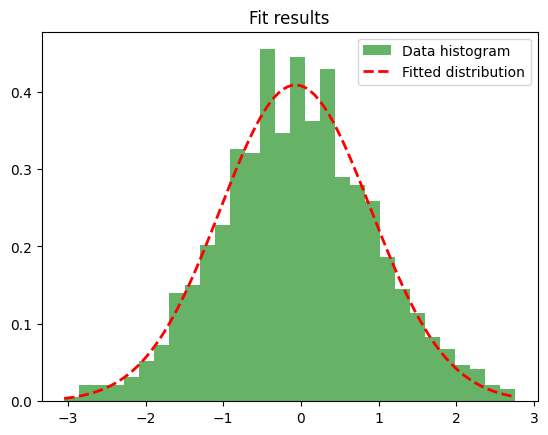

In [18]:
# Step 1: Generate synthetic data sampled from a normal distribution
np.random.seed(0)  # Setting random seed for reproducibility
mu, sigma = 0, 1  # Mean and standard deviation
num_samples = 1000  # Number of samples
data = np.random.normal(mu, sigma, num_samples)

# Step 2: Fit a normal distribution function to the generated data using Astropy
# Define a normal distribution model
gaussian_model = models.Gaussian1D(amplitude=20, mean=0.5, stddev=0.5)

# Initialize a fitter
fitter = fitting.LevMarLSQFitter()

# Generate histogram
hist, bin_edges = np.histogram(data, bins=30, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Fit the model to the data
fitted_model = fitter(gaussian_model, bin_centers, hist)

# Plot the histogram of the data and the fitted normal distribution
plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label='Data histogram')
x = np.linspace(min(data), max(data), 100)
plt.plot(x, fitted_model(x), 'r--', linewidth=2, label='Fitted distribution')
plt.title('Fit results')
plt.legend()
plt.show()